# IMDB Linear Regression Revenue
![ImdbIcon](../images/imdbheader.jpg)

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Importing so that I can use LinearRegression and OLS Models.
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import locale

In [317]:
revenue_df = pd.read_csv('../data/revenue_df.csv')

## Linear Regression

In [318]:
revenue_df.columns

Index(['movie_title', 'year', 'tagline', 'plot', 'cast', 'duration', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       'total_votes', 'us_voters_votes', 'votes', 'votes_1', 'votes_2',
       'votes_3', 'votes_4', 'votes_5', 'votes_6', 'votes_7', 'votes_8',
       'votes_9', 'votes_10', 'popularity', 'director_score', 'actor_score',
       'actress_score', 'tagline_sentiment', 'plot_sentiment', 'imdb_score',
       'profitable', 'budget', 'revenue', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [319]:
features = ['year', 'total_votes', 'votes_1', 'votes_2', 'votes_3', 'votes_4', 'votes_5', 'votes_8', 'popularity', 
            'director_score', 'profitable', 'budget']

In [320]:
X = revenue_df[features]
y = revenue_df['revenue']

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [322]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [323]:
print("Training Score:", lr.score(X_train, y_train))
print(" ")
print("Testing Score:", lr.score(X_test, y_test))

Training Score: 0.6858717793783159
 
Testing Score: 0.671439467783186


In [324]:
predictions = lr.predict(X_train)

residuals = y_train - predictions

rss = (residuals ** 2).sum()

mse = metrics.mean_squared_error(y_train, predictions)

rmse = np.sqrt(metrics.mean_squared_error(y_train, predictions))

null_predictions = np.zeros_like(y_test)

null_pred = null_predictions + y_test.mean()

baseline = metrics.mean_squared_error(y_test, null_pred, squared = False)

In [325]:
print("Baseline RMSE:", baseline)
print(" ")
print("RMSE:", rmse)
print("________________________________")
print(" ")
print("Difference:", baseline - rmse)

Baseline RMSE: 156782435.303662
 
RMSE: 105318143.21509074
________________________________
 
Difference: 51464292.088571265


In [326]:
predictions = lr.predict(X)

revenue_df['predictions'] = predictions.astype(int)

In [327]:
revenue_df.sort_values(by = 'predictions', ascending = False).head(5)

,movie_title,year,tagline,plot,cast,duration,Action,Adventure,Animation,Biography,...,actress_score,tagline_sentiment,plot_sentiment,imdb_score,profitable,budget,revenue,budget_adj,revenue_adj,predictions
722,Jurassic World,2015,The park is open.,"A new theme park, built on the original site o...","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",124,1.0,1.0,0.0,0.0,...,6.452143,0.0000,-0.1280,7.0,1,150000000,1513528810,137999939,1392445893,1558778163
131,Avatar,2009,Enter the World of Pandora.,A paraplegic Marine dispatched to the moon Pan...,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",162,1.0,1.0,0.0,0.0,...,6.304444,0.0000,-0.2500,7.8,1,237000000,2781505847,240886902,-2147483648,1169685091
577,Guardians of the Galaxy,2014,All heroes start somewhere.,A group of intergalactic criminals must pull t...,"Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...",121,1.0,1.0,0.0,0.0,...,6.300000,0.5106,-0.7096,8.0,1,170000000,773312399,156585478,712291130,1022476514
132,Avengers: Age of Ultron,2015,A New Age Has Come.,When Tony Stark and Bruce Banner try to jump-s...,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",141,1.0,1.0,0.0,0.0,...,6.748385,0.0000,-0.8176,7.3,1,280000000,1405035767,257599886,1292632337,968328941
1028,Pirates of the Caribbean: At World's End,2007,"At the end of the world, the adventure begins.","Captain Barbossa, Will Turner and Elizabeth Sw...","Johnny Depp, Geoffrey Rush, Orlando Bloom, Kei...",169,1.0,1.0,0.0,0.0,...,7.150000,0.3182,-0.6705,7.1,1,300000000,961000000,315500574,1010653508,956872455


In [328]:
revenue_df.sort_values(by = 'revenue', ascending = False).head(5)

,movie_title,year,tagline,plot,cast,duration,Action,Adventure,Animation,Biography,...,actress_score,tagline_sentiment,plot_sentiment,imdb_score,profitable,budget,revenue,budget_adj,revenue_adj,predictions
131,Avatar,2009,Enter the World of Pandora.,A paraplegic Marine dispatched to the moon Pan...,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",162,1.0,1.0,0.0,0.0,...,6.304444,0.0000,-0.2500,7.8,1,237000000,2781505847,240886902,-2147483648,1169685091
1351,The Avengers,2005,Some assembly required.,Two British Agents team up to stop Sir August ...,"Ralph Fiennes, Uma Thurman, Sean Connery, Patr...",89,1.0,1.0,0.0,0.0,...,6.472711,0.0000,-0.7003,5.9,1,220000000,1519557910,144602735,754050103,850660489
722,Jurassic World,2015,The park is open.,"A new theme park, built on the original site o...","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",124,1.0,1.0,0.0,0.0,...,6.452143,0.0000,-0.1280,7.0,1,150000000,1513528810,137999939,1392445893,1558778163
132,Avengers: Age of Ultron,2015,A New Age Has Come.,When Tony Stark and Bruce Banner try to jump-s...,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",141,1.0,1.0,0.0,0.0,...,6.748385,0.0000,-0.8176,7.3,1,280000000,1405035767,257599886,1292632337,968328941
863,Minions,2015,"Before Gru, they had a history of bad bosses","Minions Stuart, Kevin, and Bob are recruited b...","Sandra Bullock, Jon Hamm, Michael Keaton, Alli...",91,0.0,1.0,1.0,0.0,...,6.282143,-0.5423,0.0000,6.4,1,74000000,1156730962,68079970,1064192017,459974936


## Visualizations

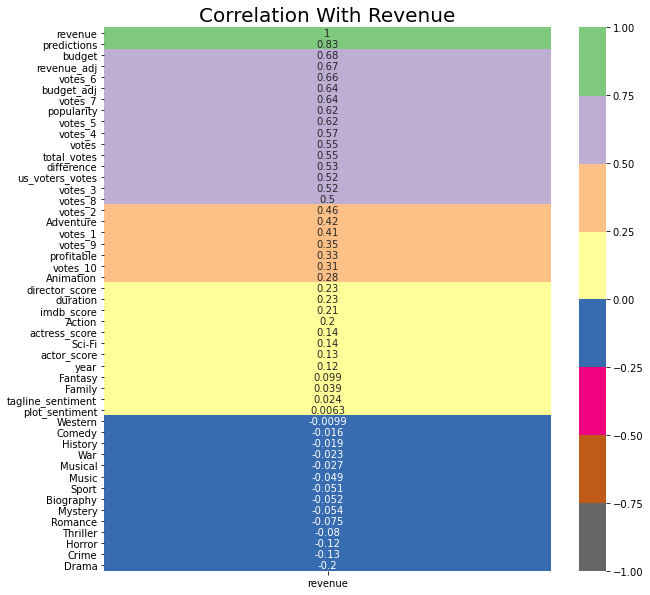

In [315]:
plt.figure(figsize = (10, 10))

movie_feature_corr = revenue_df.corr()[['revenue']]

sns.heatmap(movie_feature_corr.sort_values(by = 'revenue', ascending = False),
           vmin = -1, vmax = 1,
           cmap = 'Accent_r',
           annot = True);

plt.title("Correlation With Revenue", size = 20);